In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 편의품
df_com = pd.read_csv('./data/MainCategory/MainCategory/편의품_des.csv',encoding='cp949')
df_com=df_com.drop('Unnamed: 0',axis=1)
df_com=df_com.fillna(0)
df_com.head(3)

,고객번호,편_총구매액1,편_총구매액2,편_총구매액3,편_총구매액4,편_총구매액5,편_총구매액6,편_총구매액7,편의품_증감율,편의품_변동율,편_(증감*0.8)+(변동*0.2)
0,1,3,3,4,4,4,3,1,-2,4,-0.8
1,2,4,4,4,4,4,4,4,0,0,0.0
2,3,1,1,2,1,1,1,1,0,2,0.4


In [10]:
df_com.columns

Index(['고객번호', '편_총구매액1', '편_총구매액2', '편_총구매액3', '편_총구매액4', '편_총구매액5',
       '편_총구매액6', '편_총구매액7', '편의품_증감율', '편의품_변동율', '편_(증감*0.8)+(변동*0.2)'],
      dtype='object')

In [14]:
df= pd.read_csv('PRODCL2_지영.csv')
df

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명,상품분류,소비재분류
0,A,1,101,A010101,일용잡화,위생세제,생활잡화,편의품
1,A,1,101,A010102,일용잡화,휴지류,생활잡화,편의품
2,A,1,101,A010103,일용잡화,뷰티상품,생활잡화,편의품
3,A,1,101,A010104,일용잡화,일용잡화,생활잡화,편의품
4,A,1,101,A010105,일용잡화,세트상품,생활잡화,편의품
...,...,...,...,...,...,...,...,...
4381,D,8,802,D080204,아이메이크업,아이섀도우,화장품,편의품
4382,D,8,802,D080205,아이메이크업,메이크업세트,화장품,편의품
4383,D,8,803,D080301,립메이크업,립스틱/립라이너,화장품,편의품
4384,D,8,803,D080302,립메이크업,립글로즈/틴트,화장품,편의품


In [18]:
# 선매품
df_pre = pd.read_csv('./dataset/MainCategory/선매품_des_수정.csv',encoding='cp949')
df_pre=df_pre.drop('Unnamed: 0',axis=1)
df_pre=df_pre.fillna(0)
df_pre.head(3)

,고객번호,선_총구매액1,선_총구매액2,선_총구매액3,선_총구매액4,선_총구매액5,선_총구매액6,선_총구매액7,선매품_증감율,선매품_변동율,선_(증감*0.8)+(변동*0.2)
0,1,4,4,4,4,4,4,4,0,0,0.0
1,2,4,4,4,4,4,4,4,0,0,0.0
2,3,0,1,1,0,0,0,0,0,2,0.4


In [19]:
# 전문품
df_spe = pd.read_csv('./dataset/MainCategory/전문품_hist_수정.csv',encoding='cp949')
df_spe=df_spe.drop('Unnamed: 0',axis=1)
df_spe=df_spe.fillna(0)
df_spe.head(3)

,고객번호,전_총구매액1,전_총구매액2,전_총구매액3,전_총구매액4,전_총구매액5,전_총구매액6,전_총구매액7,전문품_증감율,전문품_변동율,전_(증감*0.8)+(변동*0.2)
0,1,0,0,3,0,3,3,0,0,12,2.4
1,2,0,0,0,3,3,0,0,0,6,1.2
2,3,0,0,0,0,0,0,0,0,0,0.0


In [20]:
# 기타
df_oth = pd.read_csv('./dataset/MainCategory/기타_des_수정.csv',encoding='cp949')
df_oth=df_oth.drop('Unnamed: 0',axis=1)
df_oth=df_oth.fillna(0)
df_oth.head(3)

,고객번호,기_총구매액1,기_총구매액2,기_총구매액3,기_총구매액4,기_총구매액5,기_총구매액6,기_총구매액7,기타_증감율,기타_변동율,기_(증감*0.8)+(변동*0.2)
0,1,3,3,4,3,4,3,3,0,4,0.8
1,2,4,2,4,0,2,2,3,-1,11,1.4
2,3,0,0,0,0,0,0,0,0,0,0.0


In [62]:
def auto(df,df1,text):
    def div_col(df):
        c=['고객번호']
        c.extend(df.columns[8:])
        df1 = df[c]
        return df1
    
    def add_CV(df,text):
        for i in df.index:
            m=df.iloc[i,1:].mean()
            if m == 0:
                cv=0
            elif m != 0:
                cv = (df.iloc[i,1:].std())/m
            df.loc[i,text+'CV'] = cv
        df_r=df[['고객번호',text+'CV']]
        return df_r
    
    def cut_seals(df1,text):
        c=df1.columns[:8]
        df1=df1[c]
        df1_new=add_CV(df1,text)
        return df1_new

    df2=div_col(df)
    display(df2)
    df3=cut_seals(df1,text)
    display(df3)
    df_sum=pd.merge(df2,df3,on='고객번호')
    return df_sum

df_com_CV=auto(df_com,df_com1,'편의품')
display(df_com_CV)

,고객번호,편의품_증감율,편의품_변동율,편_(증감*0.8)+(변동*0.2)
0,1,-2,4,-0.8
1,2,0,0,0.0
2,3,0,2,0.4
3,4,0,2,0.4
4,6,1,11,3.0
...,...,...,...,...
18861,19333,0,4,0.8
18862,19334,-1,5,0.2
18863,19335,1,5,1.8
18864,19336,0,2,0.4


,고객번호,편의품CV
0,1,0.423231
1,2,0.404963
2,3,0.355232
3,4,0.267522
4,6,0.336680
...,...,...
18861,19333,0.531012
18862,19334,0.710300
18863,19335,0.285949
18864,19336,1.110957


,고객번호,편의품_증감율,편의품_변동율,편_(증감*0.8)+(변동*0.2),편의품CV
0,1,-2,4,-0.8,0.423231
1,2,0,0,0.0,0.404963
2,3,0,2,0.4,0.355232
3,4,0,2,0.4,0.267522
4,6,1,11,3.0,0.336680
...,...,...,...,...,...
18861,19333,0,4,0.8,0.531012
18862,19334,-1,5,0.2,0.710300
18863,19335,1,5,1.8,0.285949
18864,19336,0,2,0.4,1.110957


In [64]:
#선매품
df_pre1 = pd.read_csv('./dataset/MainCategory/선매품금액횟수_원본.csv',encoding='cp949')
df_pre1 =df_pre1.drop('Unnamed: 0',axis=1)
df_pre1 =df_pre1.fillna(0)
df_pre1.head(3)

,고객번호,선_총구매액1,선_총구매액2,선_총구매액3,선_총구매액4,선_총구매액5,선_총구매액6,선_총구매액7,선_총구매액8,선_총구매횟수1,선_총구매횟수2,선_총구매횟수3,선_총구매횟수4,선_총구매횟수5,선_총구매횟수6,선_총구매횟수7,선_총구매횟수8
0,1,7592379.0,9984829.0,9257433.0,18457501.0,6811013.0,7525785.0,8083520.0,3380893.0,42.0,52.0,46.0,55.0,42.0,31.0,38.0,26.0
1,2,10529863.0,7865366.0,11660595.0,4119667.0,15054795.0,6686785.0,13785156.0,8109973.0,44.0,34.0,37.0,21.0,51.0,32.0,43.0,30.0
2,3,0.0,82407.0,30392.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [65]:
df_pre_CV=auto(df_pre,df_pre1,'선매품')
display(df_pre_CV)

,고객번호,선매품_증감율,선매품_변동율,선_(증감*0.8)+(변동*0.2)
0,1,0,0,0.0
1,2,0,0,0.0
2,3,0,2,0.4
3,4,1,3,1.4
4,6,0,0,0.0
...,...,...,...,...
18861,19333,-1,5,0.2
18862,19334,1,3,1.4
18863,19335,0,2,0.4
18864,19336,2,4,2.4


C:\Users\ns2ju\anaconda3\envs\cakd5\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\ns2ju\anaconda3\envs\cakd5\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,고객번호,선매품CV
0,1,0.415863
1,2,0.395417
2,3,1.945495
3,4,0.539876
4,6,0.255509
...,...,...
18861,19333,1.413875
18862,19334,1.111205
18863,19335,0.581560
18864,19336,0.582518


,고객번호,선매품_증감율,선매품_변동율,선_(증감*0.8)+(변동*0.2),선매품CV
0,1,0,0,0.0,0.415863
1,2,0,0,0.0,0.395417
2,3,0,2,0.4,1.945495
3,4,1,3,1.4,0.539876
4,6,0,0,0.0,0.255509
...,...,...,...,...,...
18861,19333,-1,5,0.2,1.413875
18862,19334,1,3,1.4,1.111205
18863,19335,0,2,0.4,0.581560
18864,19336,2,4,2.4,0.582518


In [66]:
#전문품
df_spe1 = pd.read_csv('./dataset/MainCategory/전문품금액횟수_원본.csv',encoding='cp949')
df_spe1 =df_spe1.drop('Unnamed: 0',axis=1)
df_spe1 =df_spe1.fillna(0)
df_spe1.head(3)

,고객번호,전_총구매액1,전_총구매액2,전_총구매액3,전_총구매액4,전_총구매액5,전_총구매액6,전_총구매액7,전_총구매액8,전_총구매횟수1,전_총구매횟수2,전_총구매횟수3,전_총구매횟수4,전_총구매횟수5,전_총구매횟수6,전_총구매횟수7,전_총구매횟수8
0,1,0.0,0.0,267256.0,0.0,509218.0,271517.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,2,0.0,0.0,0.0,385020.0,1561444.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
df_spe_CV=auto(df_spe,df_spe1,'전문품')
display(df_spe_CV)

,고객번호,전문품_증감율,전문품_변동율,전_(증감*0.8)+(변동*0.2)
0,1,0,12,2.4
1,2,0,6,1.2
2,3,0,0,0.0
3,4,3,3,3.0
4,6,3,7,3.8
...,...,...,...,...
18861,19333,0,0,0.0
18862,19334,0,0,0.0
18863,19335,0,0,0.0
18864,19336,3,9,4.2


C:\Users\ns2ju\anaconda3\envs\cakd5\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\ns2ju\anaconda3\envs\cakd5\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,고객번호,전문품CV
0,1,1.356745
1,2,2.099585
2,3,0.000000
3,4,2.645751
4,6,1.282600
...,...,...
18861,19333,0.000000
18862,19334,0.000000
18863,19335,0.000000
18864,19336,1.398080


,고객번호,전문품_증감율,전문품_변동율,전_(증감*0.8)+(변동*0.2),전문품CV
0,1,0,12,2.4,1.356745
1,2,0,6,1.2,2.099585
2,3,0,0,0.0,0.000000
3,4,3,3,3.0,2.645751
4,6,3,7,3.8,1.282600
...,...,...,...,...,...
18861,19333,0,0,0.0,0.000000
18862,19334,0,0,0.0,0.000000
18863,19335,0,0,0.0,0.000000
18864,19336,3,9,4.2,1.398080


In [68]:
#기타
df_oth1 = pd.read_csv('./dataset/MainCategory/기타금액횟수_원본.csv',encoding='cp949')
df_oth1 =df_oth1.drop('Unnamed: 0',axis=1)
df_oth1 =df_oth1.fillna(0)
df_oth1.head(3)

,고객번호,기_총구매액1,기_총구매액2,기_총구매액3,기_총구매액4,기_총구매액5,기_총구매액6,기_총구매액7,기_총구매액8,기_총구매횟수1,기_총구매횟수2,기_총구매횟수3,기_총구매횟수4,기_총구매횟수5,기_총구매횟수6,기_총구매횟수7,기_총구매횟수8
0,1,116561.0,58509.0,245847.0,102606.0,241686.0,118225.0,131206.0,77171.0,5.0,2.0,11.0,7.0,13.0,7.0,7.0,5.0
1,2,380141.0,35847.0,218618.0,0.0,34184.0,37532.0,98095.0,157730.0,1.0,1.0,5.0,0.0,1.0,4.0,4.0,5.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
df_oth_CV=auto(df_oth,df_oth1,'기타')
display(df_oth_CV)

,고객번호,기타_증감율,기타_변동율,기_(증감*0.8)+(변동*0.2)
0,1,0,4,0.8
1,2,-1,11,1.4
2,3,0,0,0.0
3,4,1,5,1.8
4,6,-1,1,-0.6
...,...,...,...,...
18861,19333,1,3,1.4
18862,19334,0,6,1.2
18863,19335,1,3,1.4
18864,19336,1,1,1.0


C:\Users\ns2ju\anaconda3\envs\cakd5\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\ns2ju\anaconda3\envs\cakd5\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,고객번호,기타CV
0,1,0.491980
1,2,1.196030
2,3,0.000000
3,4,0.615895
4,6,0.237022
...,...,...
18861,19333,0.577843
18862,19334,1.097728
18863,19335,1.239736
18864,19336,0.570862


,고객번호,기타_증감율,기타_변동율,기_(증감*0.8)+(변동*0.2),기타CV
0,1,0,4,0.8,0.491980
1,2,-1,11,1.4,1.196030
2,3,0,0,0.0,0.000000
3,4,1,5,1.8,0.615895
4,6,-1,1,-0.6,0.237022
...,...,...,...,...,...
18861,19333,1,3,1.4,0.577843
18862,19334,0,6,1.2,1.097728
18863,19335,1,3,1.4,1.239736
18864,19336,1,1,1.0,0.570862


In [70]:
df = pd.merge(df_com_CV,df_pre_CV,on='고객번호')
df

,고객번호,편의품_증감율,편의품_변동율,편_(증감*0.8)+(변동*0.2),편의품CV,선매품_증감율,선매품_변동율,선_(증감*0.8)+(변동*0.2),선매품CV
0,1,-2,4,-0.8,0.423231,0,0,0.0,0.415863
1,2,0,0,0.0,0.404963,0,0,0.0,0.395417
2,3,0,2,0.4,0.355232,0,2,0.4,1.945495
3,4,0,2,0.4,0.267522,1,3,1.4,0.539876
4,6,1,11,3.0,0.336680,0,0,0.0,0.255509
...,...,...,...,...,...,...,...,...,...
18861,19333,0,4,0.8,0.531012,-1,5,0.2,1.413875
18862,19334,-1,5,0.2,0.710300,1,3,1.4,1.111205
18863,19335,1,5,1.8,0.285949,0,2,0.4,0.581560
18864,19336,0,2,0.4,1.110957,2,4,2.4,0.582518


In [71]:
df = pd.merge(df,df_spe_CV,on='고객번호')
df

,고객번호,편의품_증감율,편의품_변동율,편_(증감*0.8)+(변동*0.2),편의품CV,선매품_증감율,선매품_변동율,선_(증감*0.8)+(변동*0.2),선매품CV,전문품_증감율,전문품_변동율,전_(증감*0.8)+(변동*0.2),전문품CV
0,1,-2,4,-0.8,0.423231,0,0,0.0,0.415863,0,12,2.4,1.356745
1,2,0,0,0.0,0.404963,0,0,0.0,0.395417,0,6,1.2,2.099585
2,3,0,2,0.4,0.355232,0,2,0.4,1.945495,0,0,0.0,0.000000
3,4,0,2,0.4,0.267522,1,3,1.4,0.539876,3,3,3.0,2.645751
4,6,1,11,3.0,0.336680,0,0,0.0,0.255509,3,7,3.8,1.282600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,0,4,0.8,0.531012,-1,5,0.2,1.413875,0,0,0.0,0.000000
18862,19334,-1,5,0.2,0.710300,1,3,1.4,1.111205,0,0,0.0,0.000000
18863,19335,1,5,1.8,0.285949,0,2,0.4,0.581560,0,0,0.0,0.000000
18864,19336,0,2,0.4,1.110957,2,4,2.4,0.582518,3,9,4.2,1.398080


In [72]:
df = pd.merge(df,df_oth_CV,on='고객번호')
df

,고객번호,편의품_증감율,편의품_변동율,편_(증감*0.8)+(변동*0.2),편의품CV,선매품_증감율,선매품_변동율,선_(증감*0.8)+(변동*0.2),선매품CV,전문품_증감율,전문품_변동율,전_(증감*0.8)+(변동*0.2),전문품CV,기타_증감율,기타_변동율,기_(증감*0.8)+(변동*0.2),기타CV
0,1,-2,4,-0.8,0.423231,0,0,0.0,0.415863,0,12,2.4,1.356745,0,4,0.8,0.491980
1,2,0,0,0.0,0.404963,0,0,0.0,0.395417,0,6,1.2,2.099585,-1,11,1.4,1.196030
2,3,0,2,0.4,0.355232,0,2,0.4,1.945495,0,0,0.0,0.000000,0,0,0.0,0.000000
3,4,0,2,0.4,0.267522,1,3,1.4,0.539876,3,3,3.0,2.645751,1,5,1.8,0.615895
4,6,1,11,3.0,0.336680,0,0,0.0,0.255509,3,7,3.8,1.282600,-1,1,-0.6,0.237022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,0,4,0.8,0.531012,-1,5,0.2,1.413875,0,0,0.0,0.000000,1,3,1.4,0.577843
18862,19334,-1,5,0.2,0.710300,1,3,1.4,1.111205,0,0,0.0,0.000000,0,6,1.2,1.097728
18863,19335,1,5,1.8,0.285949,0,2,0.4,0.581560,0,0,0.0,0.000000,1,3,1.4,1.239736
18864,19336,0,2,0.4,1.110957,2,4,2.4,0.582518,3,9,4.2,1.398080,1,1,1.0,0.570862


In [73]:
df.to_csv('./dataset/대분류라벨링.csv',encoding='cp949')

In [75]:
df_corr=df[['편의품CV','선매품CV','전문품CV','기타CV']].corr()
df_corr

,편의품CV,선매품CV,전문품CV,기타CV
편의품CV,1.000000,-0.065523,0.130148,-0.061256
선매품CV,-0.065523,1.000000,-0.306556,0.208228
전문품CV,0.130148,-0.306556,1.000000,-0.156831
기타CV,-0.061256,0.208228,-0.156831,1.000000


In [76]:
%matplotlib inline   #쥬피터노트북에서 이미지 표시가능하게 하는 쥬피터노트북 매직함수
import matplotlib.pyplot as plt 
import seaborn as sns  

UsageError: unrecognized arguments: #쥬피터노트북에서 이미지 표시가능하게 하는 쥬피터노트북 매직함수


C:\Users\ns2ju\anaconda3\envs\cakd5\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Users\ns2ju\anaconda3\envs\cakd5\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


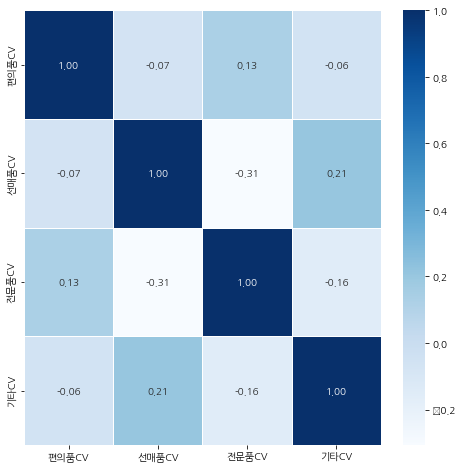

In [80]:
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(8,8))
sns.heatmap(data = df_corr, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [85]:
df_aff=pd.read_csv("./dataset/affiliate/제휴사라벨링.csv",encoding='cp949')
df_aff=df_aff.drop('Unnamed: 0',axis=1)

In [87]:
df_aff_cat = pd.merge(df,df_aff,on='고객번호')
df_aff_cat.head(3)

,고객번호,편의품_증감율,편의품_변동율,편_(증감*0.8)+(변동*0.2),편의품CV,선매품_증감율,선매품_변동율,선_(증감*0.8)+(변동*0.2),선매품CV,전문품_증감율,...,기_(증감*0.8)+(변동*0.2),기타CV,A증감율,A변동율,A증감(0.8)*변동(0.2),A_CV,B증감율,B변동율,B증감(0.8)*변동(0.2),B_CV
0,1,-2,4,-0.8,0.423231,0,0,0.0,0.415863,0,...,0.8,0.49198,-1,1,-0.6,0.404009,1,7,2.2,0.468137
1,2,0,0,0.0,0.404963,0,0,0.0,0.395417,0,...,1.4,1.19603,0,4,0.8,0.404158,-2,8,0.0,0.937181
2,3,0,2,0.4,0.355232,0,2,0.4,1.945495,0,...,0.0,0.00000,0,4,0.8,2.278603,0,4,0.8,2.645751


In [88]:
df_aff_cat.columns

Index(['고객번호', '편의품_증감율', '편의품_변동율', '편_(증감*0.8)+(변동*0.2)', '편의품CV', '선매품_증감율',
       '선매품_변동율', '선_(증감*0.8)+(변동*0.2)', '선매품CV', '전문품_증감율', '전문품_변동율',
       '전_(증감*0.8)+(변동*0.2)', '전문품CV', '기타_증감율', '기타_변동율',
       '기_(증감*0.8)+(변동*0.2)', '기타CV', 'A증감율', 'A변동율', 'A증감(0.8)*변동(0.2)',
       'A_CV', 'B증감율', 'B변동율', 'B증감(0.8)*변동(0.2)', 'B_CV'],
      dtype='object')

<AxesSubplot:>

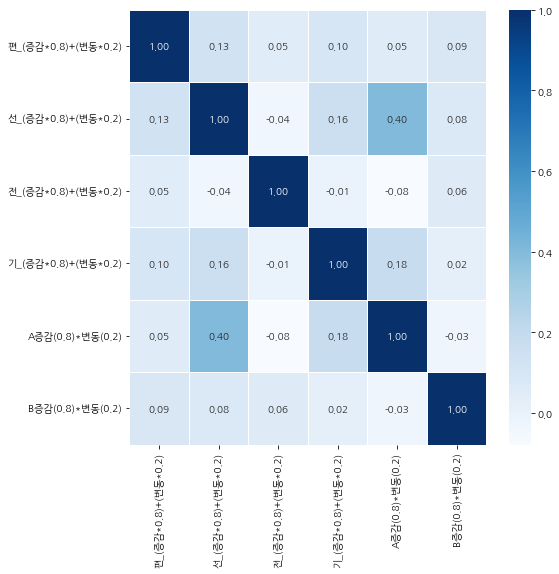

In [91]:
df_aff_cat1 = df_aff_cat[['편_(증감*0.8)+(변동*0.2)','선_(증감*0.8)+(변동*0.2)','전_(증감*0.8)+(변동*0.2)','기_(증감*0.8)+(변동*0.2)','A증감(0.8)*변동(0.2)','B증감(0.8)*변동(0.2)']]
df_aff_cat1 = df_aff_cat1.corr()
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(8,8))
sns.heatmap(data = df_aff_cat1, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

C:\Users\ns2ju\anaconda3\envs\cakd5\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Users\ns2ju\anaconda3\envs\cakd5\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


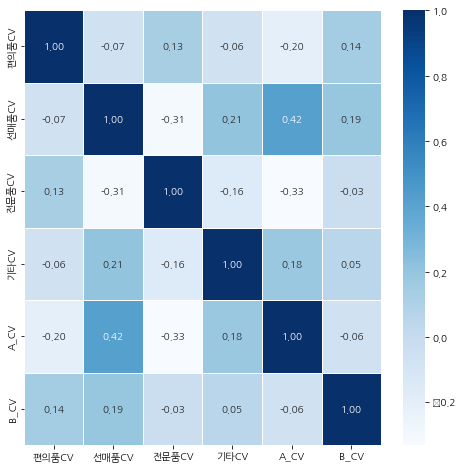

In [92]:
df_aff_cat1 = df_aff_cat[['편의품CV','선매품CV','전문품CV','기타CV','A_CV','B_CV']]
df_aff_cat1 = df_aff_cat1.corr()
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(8,8))
sns.heatmap(data = df_aff_cat1, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

<AxesSubplot:>

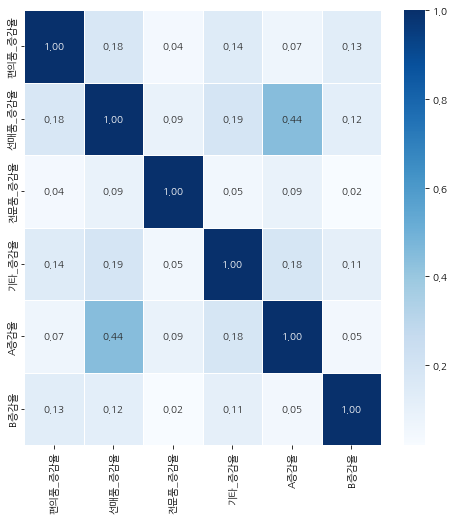

In [93]:
df_aff_cat1 = df_aff_cat[['편의품_증감율','선매품_증감율','전문품_증감율','기타_증감율','A증감율','B증감율']]
df_aff_cat1 = df_aff_cat1.corr()
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(8,8))
sns.heatmap(data = df_aff_cat1, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')